# College Scorecard Data Analysis

***

#### About
This project aims to conduct a high level survey of the US Education System as of the academic year 2022 - 2023. Our analysis will be structured. In that, we will follow a question and answer format. First we will pose a question; then we will use Python and its Data Processing libraries to create informative Visualizations and relevant Summary Statistics that try to answer our question. Initially we will stick to answering questions about a single variable at a time, followed by two at a time and finally broaden our perspective to consider interaction between three or more variables.

#### The Data
The Data used here was gathered under the [College Scorecard Project](https://collegescorecard.ed.gov/) by the U. S. Department of Education. <br>
The College Scorecard Project was inititated in a bid to increase transparency, putting the power in the hands of students and families to compare how well individual postsecondary institutions were preparing their students to be successful. This project provided data to help students and families compare college costs and outcomes as they weighed the tradeoffs of different colleges, accounting for their own needs and educational goals.

#### Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import zipfile, io

***

## Wrangling the Data

Use the [URL](https://catalog.data.gov/dataset/college-scorecard) for College Scorecard Raw Data from www.data.gov to download the file: `CollegeScorecare_Raw_Data.zip`. Unzip the data into a folder called `data`.

_Note: Preferably create the folder_`data`_in a parent directory since the extracted data is about 2.5 GB in size. Using Version Control to track such a large folder and pushing it to a repository will soon turn into a headache._ <br><br>
Here is the Python code to do the same:

In [ ]:
folder_name = r'../data'

# make a folder if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# pass the url for the zipfile from data.gov
url = r'https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip'
response = requests.get(url, stream = True)

# extract contents
with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
    for elem in zf.namelist():
        zf.extract(elem, '../data')

## Assessing and Cleaning

Here we will address the quality and tidiness issues of our data.

In [ ]:
df_clean = data_of_interest.copy()

#### Turn column names to lower case:

In [ ]:
df_clean.rename( columns = lambda col: col.strip().lower(), inplace = True )

In [ ]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
         'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
         'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [ ]:
len(states)

50

From the documentation, both the columns map the numeric value to categorical value as follows: <br>
    - 4 : Graduate's Degree
    - 3 : Bachelor's Degree
    - 2 : Associate's Degree
    - 1 : Certificate
    - 0 : N/A

In [ ]:
# replace the numeric encodings by their categorical value as above
df_clean['highdeg'].replace(to_replace = {0: np.nan, 1:'Certificate', 2:"Associate's", 3:"Bachelor's",
                                                       4:"Graduate's"},
                                         inplace = True)

df_clean['preddeg'].replace(to_replace = {0: np.nan, 1:'Certificate', 2:"Associate's", 3:"Bachelor's",
                                                       4:"Graduate's"},
                                         inplace = True)

In [ ]:
df_clean.highdeg.value_counts(), df_clean.preddeg.value_counts()

(Certificate    2259
 Graduate's     2047
 Associate's    1513
 Bachelor's      762
 Name: highdeg, dtype: int64, Certificate    2990
 Bachelor's     2095
 Associate's    1217
 Graduate's      308
 Name: preddeg, dtype: int64)

Let's compare the value counts with the original dataframe:<br>
    - 4 : Graduate's Degree
    - 3 : Bachelor's Degree
    - 2 : Associate's Degree
    - 1 : Certificate
    - 0 : N/A

In [ ]:
df_raw.HIGHDEG.value_counts(), df_raw.PREDDEG.value_counts()

(1    2259
 4    2047
 2    1513
 3     762
 0     477
 Name: HIGHDEG, dtype: int64, 1    2990
 3    2095
 2    1217
 0     448
 4     308
 Name: PREDDEG, dtype: int64)

Looks fine.

Now lets convert to categorical values according to the mapping:

In [ ]:
df_clean['highdeg'] = pd.Categorical(df_clean.highdeg, categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
                                    ordered = True)

In [ ]:
df_clean['preddeg'] = pd.Categorical(df_clean.preddeg, categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
                                    ordered = True)

- __`control`__:

In [ ]:
df_clean.control.value_counts()

3    2969
1    2063
2    2026
Name: control, dtype: int64

From the documentation, the mapping is as follows:
    - 1 : Public
    - 2 : Private Nonprofit
    - 3 : Private For-Profit

In [ ]:
df_clean.control.replace(to_replace = {1: 'Public', 2: 'Private Nonprofit', 3: 'Private For-Profit'}, inplace = True)

In [ ]:
df_clean['control'] = pd.Categorical(df_clean.control, categories = ['Public', 'Private Nonprofit', 'Private For-Profit'],
                                    ordered = False)

In [ ]:
df_clean.control.value_counts()

Private For-Profit    2969
Public                2063
Private Nonprofit     2026
Name: control, dtype: int64

#### Q.  What is the median number of branches per Institute?

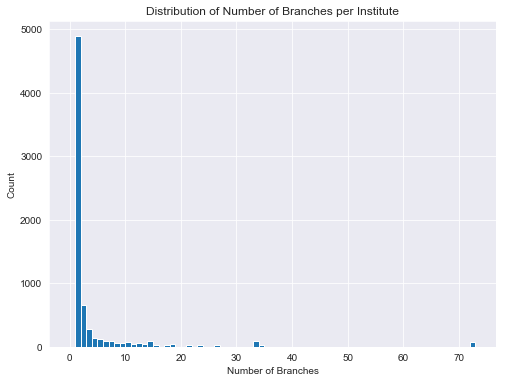

In [ ]:
sb.set_style('darkgrid')

# specify the bins
bins = np.arange(0, df.numbranch.max() + 1, 1)

# plot
plt.figure(figsize = (8,6))
plt.hist(data = df, x = 'numbranch', bins = bins)

# label
plt.title('Distribution of Number of Branches per Institute')
plt.xlabel('Number of Branches')
plt.ylabel('Count');

In [ ]:
print("Percentage of all Universities having a single branch: {0:.2f}".format(len(df.query('numbranch == 1'))/len(df) * 100))
print("The median number of branches per institute: {0:.0f}".format(df.numbranch.median()))

Percentage of all Universities having a single branch: 69.33
The median number of branches per institute: 1


Let's look at the outlier past the `numbranch` = 70 mark:

In [ ]:
df.query('numbranch > 70')

,unitid,instnm,city,stabbr,numbranch,highdeg,preddeg,control,distanceonly,tuitfte,...,satvr25,satvr75,satmt25,satmt75,actcm25,actcm75,ugds,ug25abv,pctfloan,cdr3
648,131803,Strayer University-District of Columbia,Washington,DC,73,Graduate's,Bachelor's,Private For-Profit,No,14079.0,...,NaN,NaN,NaN,NaN,NaN,NaN,687.0,0.8726,0.7210,0.106
3682,233684,Strayer University-Virginia,Arlington,VA,73,Graduate's,Bachelor's,Private For-Profit,No,13950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4256.0,0.8862,0.5652,0.106
4646,430184,Strayer University-Maryland,Suitland,MD,73,Graduate's,Bachelor's,Private For-Profit,No,13615.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2286.0,0.8875,0.6647,0.106
4988,443766,Strayer University-Tennessee,Memphis,TN,73,Graduate's,Bachelor's,Private For-Profit,No,12700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2049.0,0.8367,0.8790,0.106
4989,443784,Strayer University-Pennsylvania,Trevose,PA,73,Graduate's,Bachelor's,Private For-Profit,No,13533.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1788.0,0.8362,0.7827,0.106
5217,449038,Strayer University-Florida,Tampa,FL,73,Graduate's,Bachelor's,Private For-Profit,No,14280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1603.0,0.9085,0.7118,0.106
5285,450298,Strayer University-Delaware,Newark,DE,73,Graduate's,Bachelor's,Private For-Profit,No,13853.0,...,NaN,NaN,NaN,NaN,NaN,NaN,267.0,0.8839,0.6951,0.106
5287,450377,Strayer University-Alabama,Birmingham,AL,73,Graduate's,Bachelor's,Private For-Profit,No,13095.0,...,NaN,NaN,NaN,NaN,NaN,NaN,666.0,0.8709,0.8263,0.106
5384,453163,Strayer University-North Carolina,Morrisville,NC,73,Graduate's,Bachelor's,Private For-Profit,No,12964.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3980.0,0.8435,0.8381,0.106
5385,453215,Strayer University-New Jersey,Cherry Hill,NJ,73,Graduate's,Bachelor's,Private For-Profit,No,13316.0,...,NaN,NaN,NaN,NaN,NaN,NaN,770.0,0.8679,0.7150,0.106


#### Q. Is a Graduate Degree the most predominant award conferred at institutes? <br><br>  Q. If not, which award is?  <br><br> Q. What is the distribution of Bachelors' Degrees like, in that, are they commonly predmoinant or are they highest?

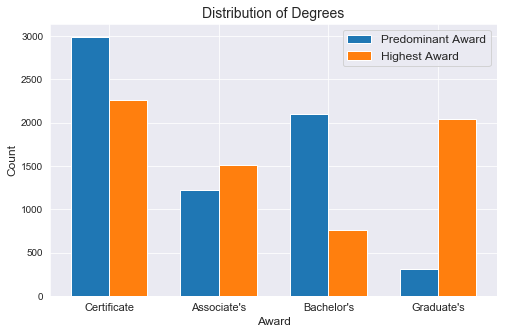

In [ ]:
# initialize the number of categories to plot
N = 4

# separate out the counts for preddeg and highdeg
preddeg_counts = df.preddeg.value_counts(sort = False).values
highdeg_counts = df.highdeg.value_counts(sort = False).values

# get the locations to plot bars at and specify the width of each bar
ind = np.arange(N)
width = 0.35

# specify the color palettes and make subplots for each preddeg and highdeg
c1, c2 = sb.color_palette()[0], sb.color_palette()[1]
fig, ax = plt.subplots(figsize = (8,5))

# plot
rects1 = ax.bar(ind, preddeg_counts, width, color = c1)
rects2 = ax.bar(ind + width, highdeg_counts, width, color = c2)

# specify the tick locations
ax.set_xticks(ind + width / 2)

# label
ax.set_xticklabels(("Certificate", "Associate's", "Bachelor's", "Graduate's"), fontsize = 11)
ax.legend( (rects1[0], rects2[0]), ('Predominant Award', 'Highest Award'), fontsize = 12 )
plt.title('Distribution of Degrees', fontsize = 14)
plt.xlabel('Award', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

In [ ]:
df.groupby(['preddeg', 'highdeg']).size().reset_index(name = 'count')

,preddeg,highdeg,count
0,Certificate,Certificate,2259
1,Certificate,Associate's,630
2,Certificate,Bachelor's,56
3,Certificate,Graduate's,36
4,Associate's,Associate's,883
5,Associate's,Bachelor's,274
6,Associate's,Graduate's,53
7,Bachelor's,Bachelor's,432
8,Bachelor's,Graduate's,1654
9,Graduate's,Graduate's,304


We will study the relationship between `preddeg` and `highdeg` in more detail when we produce bivariate visualizations ahead.

For now, we can draw the following conclusions:

> - Graduate's Degree is rarely the predominant award conferred. The institutes that confer Graduate Degrees predominantly though, also have their highest award as the same. These institutes exclusively offer Graduate Degrees only. <br><br>
> - A Certificate is the most predominantly conferred award. It is clear that most institutes that have their predominant award as a Certificate, also have their Highest award as the same. <br><br>
> - Few universities have Bachelor's Degree as their highest award. However, Bachelor's being the predominant award is fairly common.

_______________________________________________________________________________________________________________________________

#### Q. Which type of governance structure is the most common in the US across institutes?

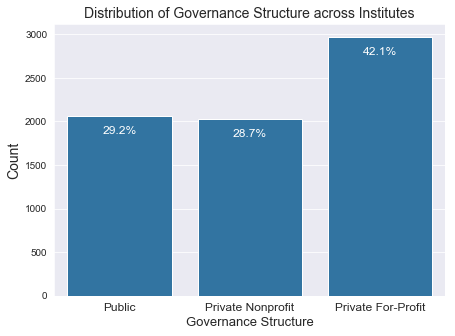

In [ ]:
# plot
plt.figure(figsize = (7, 5))
sb.countplot(data = df, x = 'control', color = sb.color_palette()[0])

# annotate
n_points = df.shape[0]
cat_counts = df.control.value_counts()
locs, labels = plt.xticks()                # get current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count / n_points)

    # print the annotations below the top of the bar
    plt.text(loc, count-200, pct_string, ha = 'center', color = 'w', fontsize = 12)

# label
plt.title('Distribution of Governance Structure across Institutes', fontsize = 14)
plt.xticks(fontsize = 12)
plt.xlabel("Governance Structure", fontsize = 13)
plt.ylabel('Count', fontsize = 14);

> - Private For-Profit Schools are the most common in the US. There are about 30% more Private For-Profits than there are Public or Private Nonprofits. <br><br>
> - The number of Public or Private Nonprofit Schools in the US is approximately the same.

_______________________________________________________________________________________________________________________________

#### Q. How much do Institutions in the US make per student as tuition fee?

In [ ]:
df.tuitfte.describe()

count      6593.000000
mean      10703.999545
std       12450.438281
min           0.000000
25%        4938.000000
50%        9148.000000
75%       13848.000000
max      712078.000000
Name: tuitfte, dtype: float64

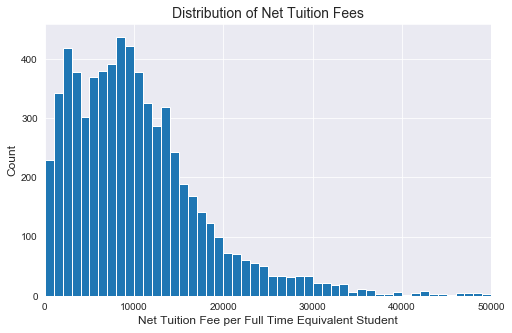

In [ ]:
plt.figure(figsize = (8,5))

# specify the bins
bins = np.arange(0, df.tuitfte.max() + 1000, 1000)

# plot
plt.hist(data = df, x = 'tuitfte', bins = bins);
plt.xlim(0,50000)

# label
plt.title('Distribution of Net Tuition Fees', fontsize = 14)
plt.xlabel('Net Tuition Fee per Full Time Equivalent Student', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

> - The distribution looks roughly bimodal with modes around 3,000 and 9,000 mark. <br><br>
> - About half of the schools in the US made more than 9,000 per student in the academic year 2022-2023. <br><br>
> - About three quarters of the schools made more than 14,000 per student in the academic year 2022-2023. <br><br>
> - On average, schools made about 10,700 dollars in the academic year 2022-2023 per student.

#### Q. What is the median monthly Faculty Salary?

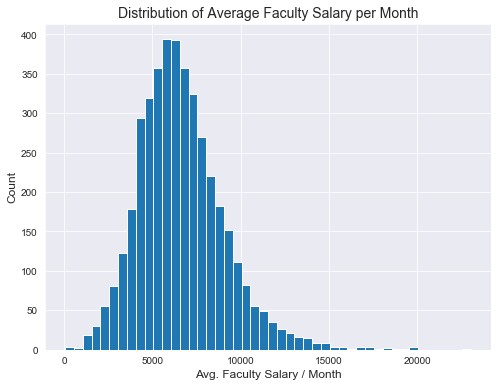

In [ ]:
# specify the bins
bins = np.arange(50, df.avgfacsal.max() + 500, 500)

# plot
plt.figure(figsize = (8, 6))
plt.hist(data = df, x = 'avgfacsal', bins = bins)

# label
plt.title('Distribution of Average Faculty Salary per Month', fontsize = 14)
plt.xlabel('Avg. Faculty Salary / Month', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

In [ ]:
print(f'The median Avg. Faculty Salary per month is: {df.avgfacsal.median()}')

The median Avg. Faculty Salary per month is: 6377.0


> - On average, the median faculty salary is 6,377 per month.

_______________________________________________________________________________________________________________________________